In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
probe_raw = pd.read_csv('LAHarborJune12018', 
                  names = ["PROBE_ID","SAMPLE_DATE", "LAT", "LONG", "HEADING",\
                           "SPEED","PROBE_DATA_PROVIDER","X","Y", "LOCAL_TIME"])


In [3]:
probe_raw.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
0,2869bff918e442c9b9be9d079dede349,2018-06-01 00:57:49,34.059920,-118.445030,183.0,4.00000,CONSUMER21,366643.071142,3.769742e+06,2018-05-31 17:57:49 -0700
1,24046157,2018-06-01 00:57:59,33.808750,-118.298480,182.0,73.00000,FLEET51,379816.173355,3.741709e+06,2018-05-31 17:57:59 -0700
2,2DD764B9-0E69-4EEC-9A91-8A36236586C4,2018-06-01 00:59:02,33.931794,-117.961762,90.0,51.00000,CONSUMER14,411110.854783,3.755010e+06,2018-05-31 17:59:02 -0700
3,19727088,2018-06-01 00:58:35,34.076356,-118.366926,359.0,33.00000,FLEET51,373875.915588,3.771465e+06,2018-05-31 17:58:35 -0700
4,0C03FB6E00,2018-06-01 00:58:05,34.003930,-118.238850,123.0,17.70274,FLEET41,385596.790831,3.763283e+06,2018-05-31 17:58:05 -0700


In [4]:
probe_raw.shape

(13027090, 10)

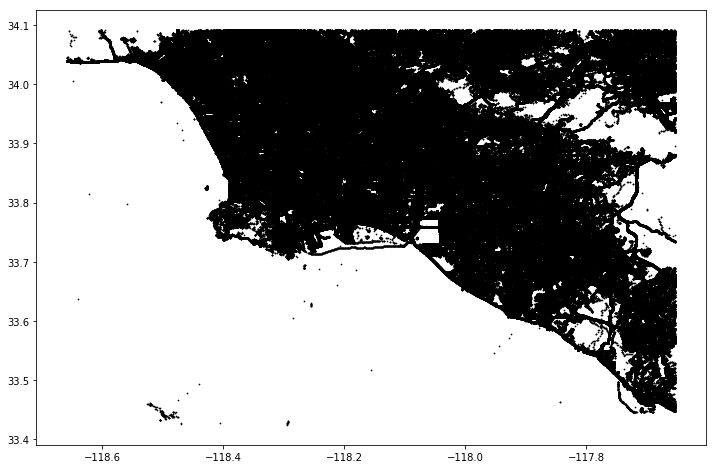

In [5]:
# Plot of entire probe area
plt.figure(figsize = (12,8))
plt.scatter(probe_raw.LONG, probe_raw.LAT, s = 0.5, c = 'k')
plt.show()

In [6]:
# 33.624115, -117.942252 - top left
# 33.586105, -117.877647 - bottom right

p2 = (33.586105, -117.877647)
p1 = (33.624115, -117.942252)


In [7]:
def crop_region(probe_raw, p1, p2):
    
    sample_df_out = probe_raw[(probe_raw['LAT'] > p2[0]) &
                    (probe_raw['LAT'] < p1[0]) &
                    (probe_raw['LONG'] > p1[1]) &
                    (probe_raw['LONG'] < p2[1])]
    
    return sample_df_out

In [8]:
crop_probe = crop_region(probe_raw, p1, p2)


In [9]:
crop_probe.shape


(30667, 10)

In [10]:
crop_probe.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
1104,87f1e18da90c420ea0f7e164eda73dd0,2018-06-01 00:52:19,33.62069,-117.92379,130.0,4.0,CONSUMER21,414311.237399,3.720483e+06,2018-05-31 17:52:19 -0700
1109,87f1e18da90c420ea0f7e164eda73dd0,2018-06-01 00:52:14,33.62077,-117.92384,156.0,9.0,CONSUMER21,414306.678548,3.720492e+06,2018-05-31 17:52:14 -0700
4066,5ed17b595ce74613a18d6da7c20db661,2018-06-01 00:18:57,33.60973,-117.88159,308.0,47.0,CONSUMER21,418215.389289,3.719233e+06,2018-05-31 17:18:57 -0700
4182,5ed17b595ce74613a18d6da7c20db661,2018-06-01 00:18:51,33.60928,-117.88101,307.0,21.0,CONSUMER21,418268.772519,3.719183e+06,2018-05-31 17:18:51 -0700
4189,5ed17b595ce74613a18d6da7c20db661,2018-06-01 00:18:36,33.60925,-117.88097,311.0,1.0,CONSUMER21,418272.455118,3.719180e+06,2018-05-31 17:18:36 -0700


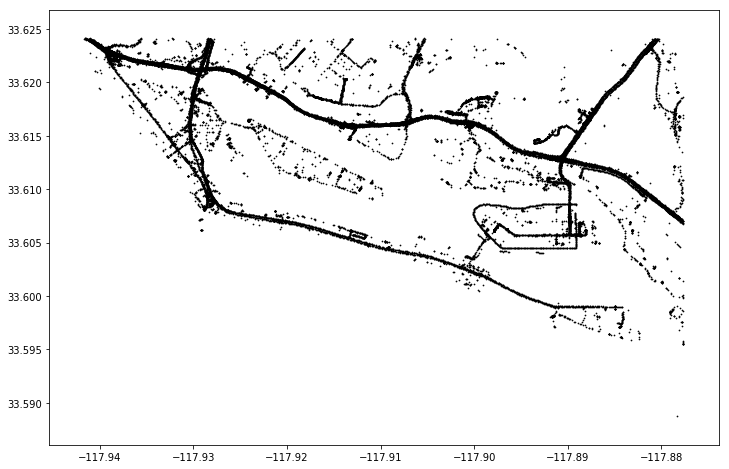

In [11]:
plt.figure(figsize = (12,8))
plt.scatter(crop_probe.LONG, crop_probe.LAT, s = 0.5, c = 'k')
plt.show()

In [12]:
crop_probe.to_csv('crop_data_Newport.csv')